#### This project is about Google’s stock price prediction using Keras’ LSTM model trained on past stock data.
#### I have got the data set from Kaggle the data set contains 2012 to 2017 google stock price data and the data set contains information such as the date, opening price, closing price, highest price, lowest price, and trading volume.


#### I considered LSTM, random forest, and Artificial neural networks to use as machine learning techniques for this google stock price prediction, And I chose to use LSTM because LSTM is able to learn long short-term dependencies in the data and handle the missing data which makes them more suitable for stock price prediction than random forest and Artificial neural networks. 

#### First i have imported the required libraries such as numpy , pandas , matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

#### This code block is used to read the training data, I'm just taking the first column here which is the open column in the data set. Then I initialized the MinMaxScaler to scale the data between 0 and 1. After that, I initialized two arrays called x_train and y_train. The first entry in the x_train array is the first 60 open stock prices and the first entry in the y_train is the 61st value of open stock price. I have done that because I want the model to predict the 61st value of stock price when I provide it with the previous 60 values. In this way, we can keep on building X_train and y_train.

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

#### And the 3rd step is getting the training data in shape here I have converted the lists to arrays and in the second step I added dummy dimensions in the end because kernel models require the data in this format only.

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### The 4th step is creating the stock price prediction model and this sequential model consists of 4 LSTM layers with 50 units each. After these LSTM layers here we can see a dense layer. I used adam optimizer here and for the loss, I used mean squared error 

LSTM
This layer uses available constraints and runtime hardware to gain the most optimized performance

Why dense is used in Python?
Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer. It's the most basic layer in neural networks.

Adam
is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Mean Squared Error
measures how close a regression line is to a set of data points.

In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

#### The 5 th steps is Training the Stock Price Prediction model. here I trained our model for 100 epochs, and the batch size I have taken is 32 ( you can also experiment with these values )

In [9]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 84ms/step - loss: 0.0356
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0044
Epoch 13/100
38/38 [=====

## Evaluating & Testing

The step 6 is reading the test data

In [4]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### Step 7 is getting the stock price predictions on test data, In here I concatenated the test open column with the train open column row-wise. The step I did above was just to take the last 60 values from the train data and also add that data to the test data, then reshape it to have just one column and as many rows, and scale it using MinMaxScaler then created the test data as did for the training data, from here we can make predictions

#### Basically What we are doing here first taking the last 60 open values from the train and making predictions from it for the 61st value. Then what we will do is we will drop the 0th open value and now the input array will be 1st open value to the 61st open value (60 values) and will predict the 62nd open value and like this, we can keep on predicting the next value and take that for predicting next values.

In [11]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


#### And this is the last step here we are plotting the predictions and real data our predictions are in the blue curve and the red curve represents its true value which means what it should be exactly, and you can see my model is not that perfect but still it is capable of catching the spikles with real google stock price it has the shape

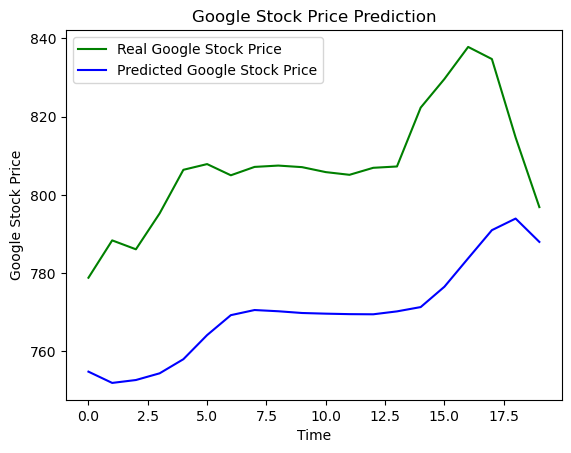

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'Green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'Blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Evaluate Results - Part E